### Assignment 3

#### Task 1 (7 points):

* Download the data (*sonar.all-data*) from the *Sonar, Mines vs. Rocks Data Set*: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
* Substitute the categories M and R of the last column for integers.
* Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.
* Plot a heatmap of the parameters. Find the best set of parameters. Comment your results.
* Plot a ROC curve. Comment your results.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### - Download the data (sonar.all-data)

In [2]:
sonar_df = pd.read_csv('sonar.all-data', sep=',')
sonar_df.columns = ["col_1","col_2","col_3","col_4","col_5","col_6","col_7","col_8","col_9","col_10","col_11","col_12","col_13","col_14","col_15","col_16","col_17","col_18","col_19","col_20","col_21","col_22","col_23","col_24","col_25","col_26","col_27","col_28","col_29","col_30","col_31","col_32","col_33","col_34","col_35","col_36","col_37","col_38","col_39","col_40","col_41","col_42","col_43","col_44","col_45","col_46","col_47","col_48","col_49","col_50","col_51","col_52","col_53","col_54","col_55","col_56","col_57","col_58","col_59","col_60","label"]
sonar_df.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,label
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [3]:
sonar_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col_1,207.0,0.029208,0.023038,0.0015,0.01330,0.0228,0.03580,0.1371
col_2,207.0,0.038443,0.033040,0.0006,0.01640,0.0308,0.04810,0.2339
col_3,207.0,0.043837,0.038521,0.0015,0.01890,0.0342,0.05820,0.3059
col_4,207.0,0.054053,0.046583,0.0058,0.02445,0.0441,0.06570,0.4264
col_5,207.0,0.075105,0.055669,0.0067,0.03770,0.0620,0.10105,0.4010
col_6,207.0,0.104599,0.059247,0.0102,0.06695,0.0921,0.13415,0.3823
col_7,207.0,0.121591,0.061897,0.0033,0.08060,0.1056,0.15305,0.3729
col_8,207.0,0.134677,0.085340,0.0055,0.08035,0.1119,0.16980,0.4590
col_9,207.0,0.177361,0.118311,0.0075,0.09675,0.1522,0.23150,0.6828
col_10,207.0,0.208245,0.134741,0.0113,0.11115,0.1810,0.26900,0.7106


In [4]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_1   207 non-null    float64
 1   col_2   207 non-null    float64
 2   col_3   207 non-null    float64
 3   col_4   207 non-null    float64
 4   col_5   207 non-null    float64
 5   col_6   207 non-null    float64
 6   col_7   207 non-null    float64
 7   col_8   207 non-null    float64
 8   col_9   207 non-null    float64
 9   col_10  207 non-null    float64
 10  col_11  207 non-null    float64
 11  col_12  207 non-null    float64
 12  col_13  207 non-null    float64
 13  col_14  207 non-null    float64
 14  col_15  207 non-null    float64
 15  col_16  207 non-null    float64
 16  col_17  207 non-null    float64
 17  col_18  207 non-null    float64
 18  col_19  207 non-null    float64
 19  col_20  207 non-null    float64
 20  col_21  207 non-null    float64
 21  col_22  207 non-null    float64
 22  co

### - Substitute the categories M and R of the last column for integers.

In [5]:
labelReplace = {"label": {"M": 0, "R": 1}}
sonar_df.replace(labelReplace, inplace=True)

In [6]:
sonar_df.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,label
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1


### - Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.

In [9]:
!pip install mglearn

     |████████████████████████████████| 540 kB 4.6 MB/s eta 0:00:01
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=0f16ba143e18bc540961c6f7ef766bf53b6afb8b7f02fc1d4a8cc4f7aed53f8d
  Stored in directory: /home/jovyan/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

import mglearn
from IPython.display import display

X = sonar_df.drop('label', axis=1)
y = sonar_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
             'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
print("Best estimator:\n{}".format(grid.best_estimator_))

Best cross-validation accuracy: 0.87
Test set score: 0.81
Best parameters: {'svm__C': 100, 'svm__gamma': 0.1}
Best estimator:
Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svm',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


### - Plot a heatmap of the parameters. Find the best set of parameters. Comment your results.

In [12]:
# convert to DataFrame
results = pd.DataFrame(grid.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008346,0.002227,0.002578,0.000328,0.001,0.001,"{'svm__C': 0.001, 'svm__gamma': 0.001}",0.517241,0.517241,0.517241,0.517241,0.535714,0.520936,0.007389,15
1,0.005911,0.000224,0.002049,0.000095,0.001,0.01,"{'svm__C': 0.001, 'svm__gamma': 0.01}",0.517241,0.517241,0.517241,0.517241,0.535714,0.520936,0.007389,15
2,0.005365,0.000041,0.001860,0.000026,0.001,0.1,"{'svm__C': 0.001, 'svm__gamma': 0.1}",0.517241,0.517241,0.517241,0.517241,0.535714,0.520936,0.007389,15
3,0.005380,0.000038,0.001834,0.000018,0.001,1,"{'svm__C': 0.001, 'svm__gamma': 1}",0.517241,0.517241,0.517241,0.517241,0.535714,0.520936,0.007389,15
4,0.005489,0.000024,0.001847,0.000026,0.001,10,"{'svm__C': 0.001, 'svm__gamma': 10}",0.517241,0.517241,0.517241,0.517241,0.535714,0.520936,0.007389,15


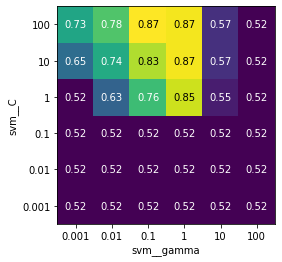

In [13]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='svm__gamma', xticklabels=param_grid['svm__gamma'],
ylabel='svm__C', yticklabels=param_grid['svm__C'], cmap="viridis")

###### Comment: 
As can be seen above the best range of parameters is C: 10 - 100 and gamma: 0.1 to 1 

### - Plot a ROC curve. Comment your results.

In [14]:
from sklearn.metrics import roc_curve

def plot_roc_curve():
    fpr, tpr, thresholds = roc_curve(y_test, grid.decision_function(X_test))
    

    close_zero = np.argmin(np.abs(thresholds))

    plt.plot(fpr, tpr, label="ROC Curve SVC")
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', 
    label="threshold zero SVC", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)

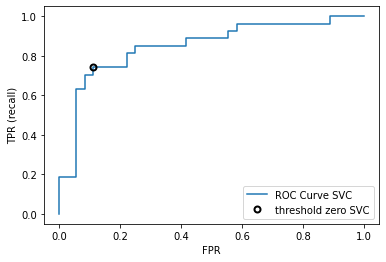

In [15]:
plot_roc_curve()

###### Observation
1. As the ROC curve above shows, when the training begain the curve leaned towards 'sensitivity' (which was very good) but as it progresses it started leaning towards 'specificity' (which is not too good; that means towards the end there are as much False positive rate as there are True positive rate)

2. The optimum threshold for this roc curve is about 0.75; If we move our threshhold to around 0.75, we would be able to classify about 80% true positive correctly with close to 0 false positive

#### Task 2 (8 points):

Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

* Download the data from the *Cardiotocography Data Set*: https://archive.ics.uci.edu/ml/datasets/Cardiotocography
* Find the best two models by creating a complete pipeline with different parameters and algorithms. One model should predict the *morphologic pattern* and the other the *fetal state*. 
* Comment on the time and preformance metrics used in each model.

### - Download the data from the Cardiotocography and cleaning the Data Set

In [18]:
!pip install xlrd

  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


In [19]:
CTG = pd.read_excel(r'CTG.xls', sheet_name='Raw Data')

In [20]:
CTG.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [21]:
CTG = CTG.drop([0]) # drop the first row

In [22]:
CTG.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [23]:
# filter out the needed columns

CTG = CTG[["LB","AC","FM","UC","DL","DS","DP","ASTV","MSTV","ALTV","MLTV","Width","Min","Max","Nmax","Nzeros","Mode","Mean","Median","Variance","Tendency","CLASS","NSP"]]

In [24]:
CTG.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
1,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
2,132.0,4.0,0.0,4.0,2.0,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
3,133.0,2.0,0.0,5.0,2.0,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
4,134.0,2.0,0.0,6.0,2.0,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
5,132.0,4.0,0.0,5.0,0.0,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [25]:
CTG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 1 to 2129
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2127 non-null   float64
 3   UC        2127 non-null   float64
 4   DL        2128 non-null   float64
 5   DS        2128 non-null   float64
 6   DP        2128 non-null   float64
 7   ASTV      2127 non-null   float64
 8   MSTV      2127 non-null   float64
 9   ALTV      2127 non-null   float64
 10  MLTV      2127 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

In [26]:
CTG.describe().T # we have two targets, one with 10 classes and the other with 3 classes

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2127.0,7.503056,39.030452,0.0,0.0,0.0,2.0,564.0
UC,2127.0,3.669017,2.877148,0.0,1.0,3.0,5.0,23.0
DL,2128.0,1.576128,2.517794,0.0,0.0,0.0,3.0,16.0
DS,2128.0,0.003759,0.061213,0.0,0.0,0.0,0.0,1.0
DP,2128.0,0.127820,0.471687,0.0,0.0,0.0,0.0,4.0
ASTV,2127.0,47.008933,17.210648,12.0,32.0,49.0,61.0,87.0
MSTV,2127.0,1.335449,0.891543,0.2,0.7,1.2,1.7,7.0
ALTV,2127.0,9.884814,18.476534,0.0,0.0,0.0,11.0,91.0


In [27]:
CTG.tail()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
2125,140.0,1.0,0.0,9.0,0.0,0.0,0.0,78.0,0.4,27.0,...,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,5.0,2.0
2126,142.0,1.0,1.0,5.0,0.0,0.0,0.0,74.0,0.4,36.0,...,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0,1.0
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2129,NaN,NaN,564.0,23.0,16.0,1.0,4.0,87.0,7.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Removing the abitrary data at the bottom of the dataframe (they were the sums of some columns in the excel sheet)

CTG = CTG.drop([2127,2128,2129])

In [29]:
CTG.tail()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
2122,140.0,0.0,0.0,6.0,0.0,0.0,0.0,79.0,0.2,25.0,...,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,5.0,2.0
2123,140.0,1.0,0.0,9.0,0.0,0.0,0.0,78.0,0.4,22.0,...,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,5.0,2.0
2124,140.0,1.0,0.0,7.0,0.0,0.0,0.0,79.0,0.4,20.0,...,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,5.0,2.0
2125,140.0,1.0,0.0,9.0,0.0,0.0,0.0,78.0,0.4,27.0,...,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,5.0,2.0
2126,142.0,1.0,1.0,5.0,0.0,0.0,0.0,74.0,0.4,36.0,...,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0,1.0


In [30]:
CTG.isna().sum().sum() # no na values anymore

0

### - Find the best two models by creating a complete pipeline with different parameters and algorithms. One model should predict the morphologic pattern and the other the fetal state.

In [31]:
# DataSet preparation

Xmf = CTG.iloc[:,0:21] # same features for morphologic pattern and fetal state
ym = CTG.iloc[:,21]    # target for morphologic pattern (10 classes)
yf = CTG.iloc[:,22]    # target for fetal state (3 classes)

In [32]:
Xmf.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
1,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
2,132.0,4.0,0.0,4.0,2.0,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
3,133.0,2.0,0.0,5.0,2.0,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
4,134.0,2.0,0.0,6.0,2.0,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
5,132.0,4.0,0.0,5.0,0.0,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [33]:
ym.head()

1    9.0
2    6.0
3    6.0
4    6.0
5    2.0
Name: CLASS, dtype: float64

In [34]:
yf.head()

1    2.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: NSP, dtype: float64

In [35]:
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(Xmf, ym, test_size=0.2, random_state=1)
    
# Scale X
#scaler = StandardScaler()
#scaler.fit(X_train)
    
#X_train = scaler.transform(X_train)
                           
#X_test = scaler.transform(X_test)


######  Morphologic pattern prediction

In [36]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import time 


# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(random_state=42))])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()),('clf', RandomForestClassifier(random_state=42))])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),('clf', svm.SVC(random_state=42))])

pipe_svm_pca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clf', svm.SVC(random_state=42))])

# Set grid search params
param_range = [1, 2, 3, 4, 5]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': param_range_fl,
                   'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'],
                    'clf__C': param_range}]

# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,param_grid=grid_params_lr,scoring='accuracy',cv=10) 

gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,param_grid=grid_params_lr,scoring='accuracy',cv=10)

gs_rf = GridSearchCV(estimator=pipe_rf,param_grid=grid_params_rf,scoring='accuracy',cv=10,n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,param_grid=grid_params_rf,scoring='accuracy',cv=10, n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,param_grid=grid_params_svm,scoring='accuracy',cv=10,n_jobs=jobs)

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,param_grid=grid_params_svm,scoring='accuracy',cv=10,n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca, gs_svm, gs_svm_pca]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 2: 'Random Forest', 3: 'Random Forest w/PCA', 4: 'Support Vector Machine', 5: 'Support Vector Machine w/PCA'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''


for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    start_time = time.time()
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])



/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.798
Test set accuracy score for best params: 0.765 
--- 17.8020281791687 seconds ---

Estimator: Logistic Regression w/PCA
Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.469
Test set accuracy score for best params: 0.481 
--- 2.154500961303711 seconds ---

Estimator: Random Forest
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 3}
Best training accuracy: 0.836
Test set accuracy score for best params: 0.800 
--- 71.06064081192017 seconds ---

Estimator: Random Forest w/PCA
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 2}
Best training accuracy: 0.524
Test set accuracy score for best params: 0.509 
--- 76.68895220756531 second

######  Fetal State prediction

In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(Xmf, yf, test_size=0.2, random_state=1)
    
# Scale X
#scaler = StandardScaler()
#scaler.fit(X_train)
    
#X_train = scaler.transform(X_train)
                           
#X_test = scaler.transform(X_test)

In [39]:
# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(random_state=42))])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()),('clf', RandomForestClassifier(random_state=42))])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),('clf', svm.SVC(random_state=42))])

pipe_svm_pca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clf', svm.SVC(random_state=42))])

# Set grid search params
param_range = [1, 2, 3, 4, 5]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': param_range_fl,
                   'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'],
                    'clf__C': param_range}]

# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,param_grid=grid_params_lr,scoring='accuracy',cv=10) 

gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,param_grid=grid_params_lr,scoring='accuracy',cv=10)

gs_rf = GridSearchCV(estimator=pipe_rf,param_grid=grid_params_rf,scoring='accuracy',cv=10,n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,param_grid=grid_params_rf,scoring='accuracy',cv=10, n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,param_grid=grid_params_svm,scoring='accuracy',cv=10,n_jobs=jobs)

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,param_grid=grid_params_svm,scoring='accuracy',cv=10,n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca, gs_svm, gs_svm_pca]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 2: 'Random Forest', 3: 'Random Forest w/PCA', 4: 'Support Vector Machine', 5: 'Support Vector Machine w/PCA'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''


for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    start_time = time.time()
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])


Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.896
Test set accuracy score for best params: 0.883 
--- 4.079923152923584 seconds ---

Estimator: Logistic Regression w/PCA
Best params: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.795
Test set accuracy score for best params: 0.765 
--- 0.9518005847930908 seconds ---

Estimator: Random Forest
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5}
Best training accuracy: 0.925
Test set accuracy score for best params: 0.892 
--- 63.90931415557861 seconds ---

Estimator: Random Forest w/PCA
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 2}
Best training accuracy: 0.861
Test set accuracy score for best params: 0.824 
--- 65.01133275032043 s

### - Comment on the time and preformance metrics used in each model.

<PRE>
1. On Morphologic pattern
We had 6 models in all, and we used test set accuracy performance metric to evaluate.
Based on this SVM had the best (which was 83.3%,)
And a run time of just 1.57 seconds (the next fastest after SVM with PCA)

2. On Fetal State
We equally used the same 6 models.
And SVM still made it as the best (with test set accuracy of 91.8%).
And with the fastest time of 1.03 seconds 

It proves that the 3 classes Fetal State classification converges faster than the 10 classes Morphologic pattern
classification. And also that SVM does better than the rest in this case
    
</PRE>